<a href="https://colab.research.google.com/github/possomartin/Notebooks/blob/main/XOR_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

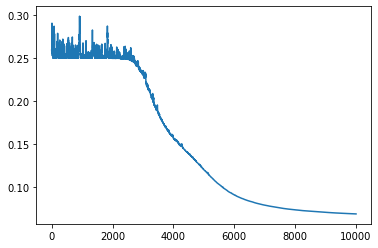

In [ ]:
#cálculo numérico y análisis de datos
import numpy as np
#para graficos en dos dimensiones
import matplotlib.pyplot as plt
#biblioteca de aprendizaje automatico
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

#modelo de la red neuronas: entradas, ocultas y salidas
N_entrada = 2; N_ocultas = 4; N_salida = 1
#N_entradaBias = 3

#ejercicio XOR entradas sin bia
r_i = np.matrix('0 1 0 1; 0 0 1 1')
#r_i_bia = np.matrix('1 1 1 1;0 1 0 1;0 0 1 1')

#salidas
r_d = np.matrix('0,1,1,0')

#inicializacion randomica de pesos
#np.random.rand genera un aleatorio entre 0 y 1
#(3,2) matriz de randomicos de 3 filas y 2 columnas
w_h = np.random.rand(N_ocultas,N_entrada) - 0.5

w_o = np.random.rand(N_salida,N_ocultas) -0.5
#print("pesos entrada y oculta",w_h)
#print("pesos oculta salida",w_h)

#numero de repeticiones
training_steps = 10000

mse = []


for i in range(training_steps):
    #seleccionamos el ejemplo de entrenameinto randomicamente
    i = np.floor(4*np.random.rand()).astype('int')
    #print("ejemplo i",i)

    s_h = w_h*r_i[:,i]
    #salidas en la capa oculta
    r_h = 1/(1+np.exp(-s_h))

    #r_h = 1/(1+np.exp(-w_h*r_i[:,i]))
    #print("salidas capa oculta",r_h)

    #salidas de la red
    s_o = w_o*r_h
    #print("so",s_o)
    r_o = 1/(1+np.exp(-s_o))
    #print("ro",r_o)

   # r_o = 1/(1+np.exp(-w_o*r_h))
    #print("ro",r_o)
    #print("salidas ",r_o)

    #calculo del error
    #error salida deseada - salida obtenida
    #capa salida para retropropagar derivada del erro
    #salidaObtenida *(1-salida obtenida)
    error = r_d[:,i]-r_o
    #print("error",error)
    #derivada
    d_o = (r_o*(1-r_o))*error
    #print("derivada error salida",d_o)


    #multiplicacion de matrices por elemento np.multiply
    #error de la capa oculta
    #derivada salidaOculta*(1-salidaOculta)*sumatoria(derivadaSalida*pesos salida)
    #Transpuesta
    d_h = np.multiply(np.multiply(r_h,(1-r_h)),(w_o.T*d_o))
    #print("derivada error oculta",d_h)

    #actualizar los pesos capa de salida
    #pesosSalida+velocidadAprendizaje*derivadaSalida*entradaSalida
    w_o = w_o +0.7*(r_h*d_o.T).T
    #print("variacion pesos capa salida",w_o)

    #actualizar los pesos capa de entrada
    #pesosEntrada+velocidadAprendizaje*derivadaoculta*entrada
    w_h = w_h + 0.7*(r_i[:,i]*d_h.T).T
    #print("variacion pesos entrada",w_h)

    #testear todos los patrones
    test_h = 1/(1+np.exp(-w_h*r_i))
    test_o = 1/(1+np.exp(-w_o*test_h))
    #print("test salida",test_o)
    mse +=[mean_squared_error(r_d,test_o)]
    #print("error cuadratico medio",mse)


plt.plot(mse)
plt.show()

In [ ]:
#probar la red
test_o

matrix([[0.07789258, 0.91225596, 0.90005908, 0.51057055]])